### Import Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

### Check data (JSON file)

In [2]:
df = pd.read_json('Challenge2_data.json')
df

,Apparent Magitude (m),Absolute Magnitude (M),Redshift (z)
0,14.541391,-16.339065,0.003676
1,16.756129,-18.177730,0.022604
2,15.829605,-16.696145,0.008038
3,16.294575,-19.512265,0.036352
4,13.829094,-19.665756,0.010395
5,14.182569,-21.249230,0.033587
6,16.039077,-17.778063,0.014448
7,17.138868,-17.656339,0.017838
8,15.998251,-19.397655,0.030485
9,17.910487,-16.931928,0.025338


In [3]:
df.columns

Index(['Apparent Magitude (m)', 'Absolute Magnitude (M)', 'Redshift (z)'], dtype='object')

### Rename columns

In [4]:
df.rename(columns = {'Apparent Magitude (m)':'m', 'Absolute Magnitude (M)':'M', 'Redshift (z)':'z'}, inplace = True)
df

,m,M,z
0,14.541391,-16.339065,0.003676
1,16.756129,-18.177730,0.022604
2,15.829605,-16.696145,0.008038
3,16.294575,-19.512265,0.036352
4,13.829094,-19.665756,0.010395
5,14.182569,-21.249230,0.033587
6,16.039077,-17.778063,0.014448
7,17.138868,-17.656339,0.017838
8,15.998251,-19.397655,0.030485
9,17.910487,-16.931928,0.025338


### Raw data to numpy array

In [5]:
m = df['m'].to_numpy()
M = df['M'].to_numpy()
z = df['z'].to_numpy()
m, M, z

(array([14.54139124, 16.75612879, 15.82960489, 16.29457481, 13.82909389,
        14.18256872, 16.03907735, 17.13886801, 15.9982508 , 17.91048687,
        15.07466972, 15.16403959, 12.48463919, 15.6016586 , 13.75361766,
        14.50453086, 14.14702991, 16.04484713, 15.19214105]),
 array([-16.33906506, -18.17772989, -16.696145  , -19.5122652 ,
        -19.66575613, -21.24923043, -17.77806262, -17.65633895,
        -19.39765543, -16.93192787, -20.91861571, -18.86686028,
        -23.32220082, -18.32499057, -21.31056846, -18.8092583 ,
        -18.51036467, -20.29101151, -16.31300893]),
 array([0.00367597, 0.02260424, 0.00803785, 0.03635172, 0.01039452,
        0.03358662, 0.01444763, 0.017838  , 0.03048528, 0.02533826,
        0.0301413 , 0.017838  , 0.03255174, 0.01106889, 0.01715899,
        0.0120813 , 0.0060223 , 0.03220702, 0.00401082]))

### Distance modulus 

In [6]:
d = (np.power(10, ((m-M+5)/5))) / 1e6 # pc -> Mpc
d

array([ 15.,  97.,  32., 145.,  50., 122.,  58.,  91., 120.,  93., 158.,
        64., 145.,  61., 103.,  46.,  34., 185.,  20.])

### Recession velocity

In [7]:
c = sp.constants.c / 1e3 # m/s -> km/s
c

299792.458

In [8]:
v = c*z
v

array([ 1102.02717461,  6776.58083794,  2409.68771404, 10897.97009507,
        3116.19957399, 10069.01498452,  4331.29181072,  5347.69673997,
        9139.25737589,  7596.21881549,  9036.13397941,  5347.69673997,
        9758.76560163,  3318.3692583 ,  5144.13548681,  3621.88244544,
        1805.43909677,  9655.42263673,  1202.41314441])

### Plot data

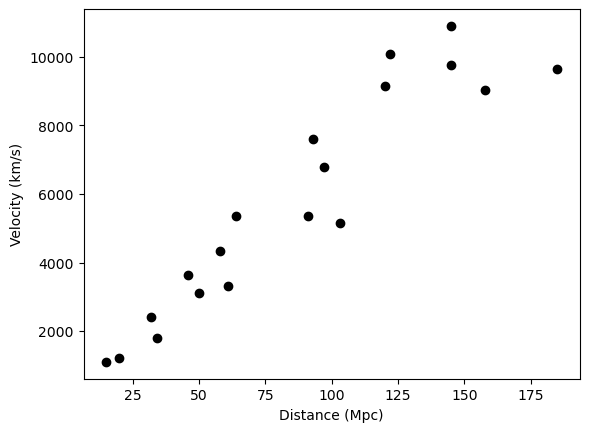

In [9]:
plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (km/s)')
plt.scatter(d, v, color='black')

### Linear regression

##### Mean squared error

In [10]:
def mse(x, y, w, b):
    error = 0
    n = len(x)
    for i in range(n):
        pred = (w*x[i]) + b
        error += np.power((y[i]-pred), 2)
    mse = error/n
    return mse

##### Gradient descent

In [11]:
def gradient_descent(x, y, w, b, alpha):
    dw = 0
    db = 0
    n = len(x)
    for i in range(n):
        pred = (w*x[i]) + b
        dw += (-2/n) * (y[i]-pred) * x[i] # Derivative of mean squared error (w)
        db += (-2/n) * (y[i]-pred) # Derivative of mean squared error (b)
    w = w - alpha*dw
    b = b - alpha*db

    return w, b

In [12]:
w = 0
b = 0
epochs = 100
alpha = 1e-5

In [13]:
for i in range(epochs):
    w, b = gradient_descent(d, v, w, b, alpha)
    loss = mse(d, v, w, b)
    if i%1 == 0:
        print(i+1, w, b, loss)

1 12.854695804584734 0.11544863527550715 28534910.66541451
2 23.19139052205398 0.2087172285007147 18895870.269289225
3 31.503314014904326 0.2841504377836029 12663203.523982506
4 38.18708153394924 0.34524188302885095 8633120.26328586
5 43.561618734625725 0.3948008485886524 6027241.891419662
6 47.88337963247481 0.4350863319460808 4342263.716772968
7 51.358583642478955 0.467914834739553 3252745.6335013225
8 54.153055608620384 0.49474703951834104 2548255.940376069
9 56.40013835356237 0.5167575081240801 2092728.122893467
10 58.2070553061279 0.5348907274478576 1798180.6827284053
11 59.66002680768164 0.5499061768596119 1607724.207553673
12 60.82838422867728 0.5624145677612763 1484573.631229828
13 61.767878205831224 0.572906984481426 1404943.4893702846
14 62.52333885679362 0.5817783170073936 1353453.945115675
15 63.13081490794493 0.589346103678366 1320160.2953491597
16 63.619293806603366 0.5958656829432504 1298632.2299844623
17 64.01208489505076 0.6015423771692849 1284711.8684574417
18 64.3279

In [14]:
w, b

(65.6230020784074, 0.7996862336741691)

##### Plot data + fit line

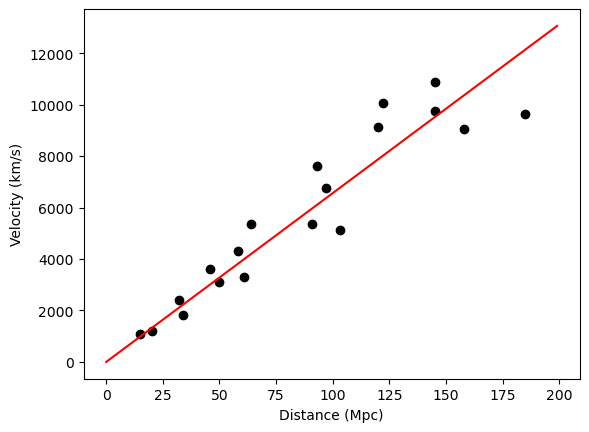

In [15]:
plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (km/s)')
plt.scatter(d, v, color='black')
plt.plot(list(range(0, 200)), [(w*x) + b for x in range(0, 200)], color="red") # Trendline

In [16]:
h = w
h

65.6230020784074

In [17]:
age_u = ((3.086*1e19/h) / (3.154*1e7)) / 1e9
print('Hubble constant: ', h, 'km/s/Mpc')
print('Age of the universe: ', age_u, 'billion years')

Hubble constant:  65.6230020784074 km/s/Mpc
Age of the universe:  14.910016992590394 billion years
